In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
market_db = pd.read_csv(r'C:\Users\Hello\Downloads\Updated_Customer_Data_for_Marketing_Analysis_-_Distinct_Names.csv')

In [5]:
print(market_db.head())

           Nama       Username  Umur    Domisili  Gender  \
0  Fajar Kusuma  fajarkusuma82    25   Palembang    Male   
1   Nina Wijaya   ninawijaya62    23    Surabaya  Female   
2  Tina Wahyudi  tinawahyudi72    23  Yogyakarta  Female   
3     Tina Sari     tinasari80    17  Yogyakarta  Female   
4    Dewi Putra    dewiputra33    26   Palembang  Female   

                 Produk_Dibeli  Jumlah_Pembelian  Total Affiliate_Direct  \
0  Stay-Ink! Lipcream Matte 02                 1  59000           Direct   
1         Stay-Ink! Liptint 02                 1  49000        Affiliate   
2         Stay-Ink! Liptint 04                 1  49000           Direct   
3  Stay-Ink! Lipcream Matte 01                 1  59000        Affiliate   
4        Stay-Ink! Lipgloss 01                 1  49000           Direct   

   Rating  
0       1  
1       4  
2       4  
3       5  
4       2  


In [8]:
print(market_db.isnull().sum())

Nama                0
Username            0
Umur                0
Domisili            0
Gender              0
Produk_Dibeli       0
Jumlah_Pembelian    0
Total               0
Affiliate_Direct    0
Rating              0
dtype: int64


In [116]:
print(market_db['Produk_Dibeli'].unique())

['Stay-Ink! Lipcream Matte 02' 'Stay-Ink! Liptint 02'
 'Stay-Ink! Liptint 04' 'Stay-Ink! Lipcream Matte 01'
 'Stay-Ink! Lipgloss 01' 'Stay-Ink! Lipgloss 02' 'Stay-Ink! Liptint 01'
 'Stay-Ink! Lip Moisturizer' 'Stay-Ink! Lipcream Matte 03'
 'Stay-Ink! Lipcream Matte 04' 'Stay-Ink! Liptint 03']


In [9]:
print("MARKET ANALYSIS")

MARKET ANALYSIS


In [29]:
target_market = market_db[(market_db['Umur'] >= 17) & (market_db['Umur'] <=30) & (market_db['Gender'] == 'Female')]

In [15]:
market_gender = market_db[(market_db['Gender'] == 'Male') | (market_db['Gender'] == 'Female')]

In [17]:
from __future__ import print_function

In [22]:
gender_counts = market_db['Gender'].value_counts()

In [23]:
print(gender_counts)

Gender
Female    452
Male       48
Name: count, dtype: int64


In [33]:
print(target_market[['Umur', 'Gender']].value_counts().sum())

396


In [35]:
print("the market target is female age 17-30, from the analysis above it shows that from total of 500 customers, 452 customers are female and 48 customers are male. However the there are 396 customers within the target market")

the market target is female age 17-30, from the analysis above it shows that from total of 500 customers, 452 customers are female and 48 customers are male. However the there are 396 customers within the target market


In [36]:
prod_sales = market_db['Produk_Dibeli'].value_counts()

In [37]:
print("Total units sold per product:")

Total units sold per product:


In [38]:
print(prod_sales)

Produk_Dibeli
Stay-Ink! Liptint 04           54
Stay-Ink! Lipcream Matte 02    51
Stay-Ink! Liptint 02           48
Stay-Ink! Lipcream Matte 03    48
Stay-Ink! Liptint 01           47
Stay-Ink! Lip Moisturizer      47
Stay-Ink! Lipcream Matte 01    46
Stay-Ink! Lipcream Matte 04    45
Stay-Ink! Liptint 03           41
Stay-Ink! Lipgloss 02          38
Stay-Ink! Lipgloss 01          35
Name: count, dtype: int64


In [39]:
demographic_sum = market_db.groupby(['Gender','Domisili']).agg({'Umur': ['mean', 'count']})

In [40]:
print("Demographic Summary")

Demographic Summary


In [41]:
print(demographic_sum)

                          Umur      
                          mean count
Gender Domisili                     
Female Bandung       24.357143    56
       Denpasar      24.741935    31
       Jakarta       22.795455    44
       Johor Bahru   24.000000     1
       Kuala Lumpur  20.428571     7
       Makassar      24.612245    49
       Malang        23.120000    50
       Medan         24.111111    36
       Melaka        27.000000     3
       Palembang     23.688889    45
       Penang        24.750000     4
       Semarang      23.928571    42
       Singapore     19.333333     3
       Surabaya      24.027778    36
       Yogyakarta    23.977778    45
Male   Bandung       23.000000     5
       Denpasar      23.000000     1
       Jakarta       23.666667     9
       Kuala Lumpur  22.000000     1
       Makassar      22.285714     7
       Malang        21.250000     4
       Medan         19.800000     5
       Palembang     22.333333     3
       Semarang      24.500000     4
 

In [42]:
ratings = market_db.groupby('Produk_Dibeli')['Rating'].mean().sort_values(ascending=False)

In [43]:
print("Average Rating")

Average Rating


In [44]:
print(ratings)

Produk_Dibeli
Stay-Ink! Liptint 01           4.340426
Stay-Ink! Liptint 02           4.250000
Stay-Ink! Liptint 04           4.129630
Stay-Ink! Lipcream Matte 01    4.065217
Stay-Ink! Lipcream Matte 04    4.044444
Stay-Ink! Lipcream Matte 02    4.039216
Stay-Ink! Lip Moisturizer      4.021277
Stay-Ink! Lipcream Matte 03    3.979167
Stay-Ink! Lipgloss 01          3.942857
Stay-Ink! Liptint 03           3.902439
Stay-Ink! Lipgloss 02          3.789474
Name: Rating, dtype: float64


In [45]:
print(ratings.idxmax())

Stay-Ink! Liptint 01


In [46]:
print(ratings.idxmin())

Stay-Ink! Lipgloss 02


In [47]:
sales_channel = market_db['Affiliate_Direct'].value_counts(normalize=True) * 100

In [48]:
print(sales_channel)

Affiliate_Direct
Direct       69.4
Affiliate    30.6
Name: proportion, dtype: float64


In [49]:
import seaborn as sns

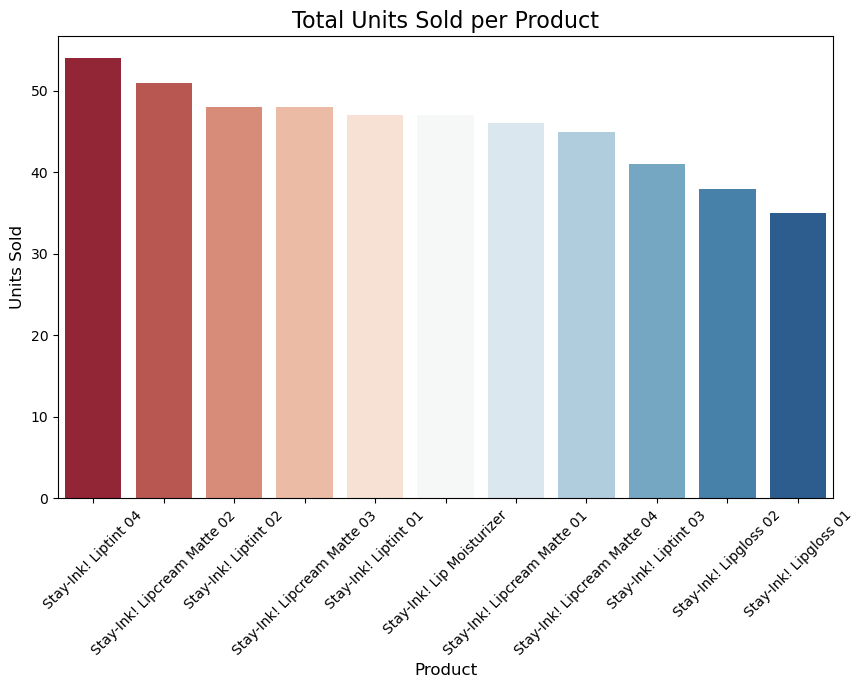

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x=prod_sales.index, y=prod_sales.values, palette="RdBu")
plt.title("Total Units Sold per Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45)
plt.savefig("product_sales.png", bbox_inches='tight')
plt.show()

In [77]:
liptint_products = ["Stay-Ink! Liptint 01", "Stay-Ink! Liptint 02", "Stay-Ink! Liptint 03", "Stay-Ink! Liptint 04"]

In [86]:
lipcream_products = ["Stay-Ink! Lipcream Matte 01", "Stay-Ink! Lipcream Matte 02", "Stay-Ink! Lipcream Matte 03", "Stay-Ink! Lipcream Matte 04"]

In [118]:
lipgloss_products = ["Stay-Ink! Lipgloss 01", "Stay-Ink! Lipgloss 02"]

In [79]:
lip_moisturizer_products = ["Stay-Ink! Lip Moisturizer"]

In [80]:
liptint_sales = market_db[market_db['Produk_Dibeli'].isin(liptint_products)]['Jumlah_Pembelian'].sum()

In [81]:
print(f"Total sales for Stay-Ink! Liptint: {liptint_sales}")

Total sales for Stay-Ink! Liptint: 190


In [87]:
lipcream_sales = market_db[market_db['Produk_Dibeli'].isin(lipcream_products)]['Jumlah_Pembelian'].sum()

In [88]:
print(f"Total sales for Stay-Ink! Lipcream Matte: {lipcream_sales}")

Total sales for Stay-Ink! Lipcream Matte: 190


In [119]:
lipgloss_sales = market_db[market_db['Produk_Dibeli'].isin(lipgloss_products)]['Jumlah_Pembelian'].sum()

In [120]:
print(lipgloss_sales)

73


In [89]:
lip_moisturizer_sales = market_db[market_db['Produk_Dibeli'].isin(lip_moisturizer_products)]['Jumlah_Pembelian'].sum()

In [90]:
print(f"Total sales for Stay-Ink! Lip Moisturizer: {lip_moisturizer_sales}")

Total sales for Stay-Ink! Lip Moisturizer: 47


In [121]:
categories = ["Liptint", "Lipcream", "Lip Moisturizer", "Lipgloss"]

In [122]:
sales = [liptint_sales, lipcream_sales, lip_moisturizer_sales, lipgloss_sales]

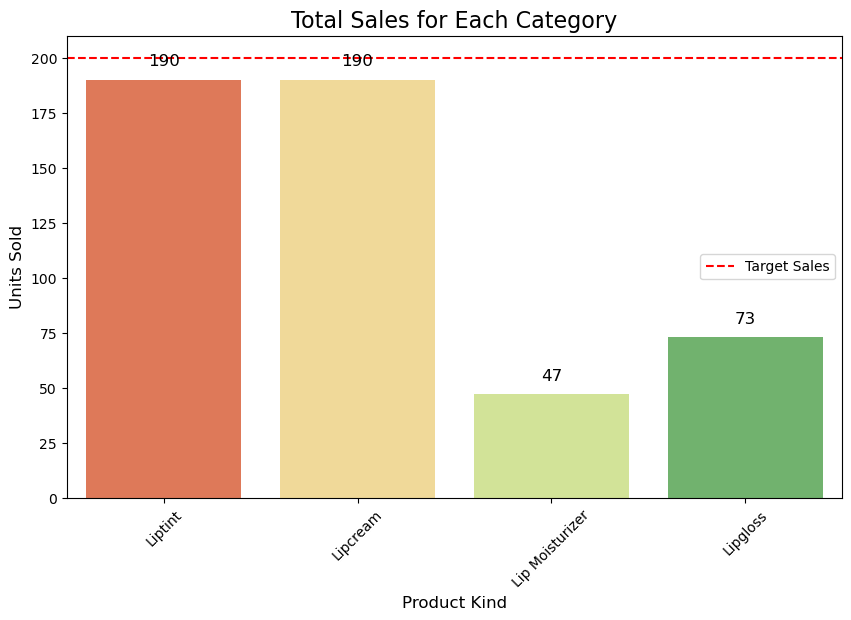

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=sales, palette="RdYlGn")
plt.title("Total Sales for Each Category", fontsize=16)
plt.xlabel("Product Kind", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45)
for i, value in enumerate(sales):
    plt.text(i, value + 5, f"{value}", ha='center', va='bottom', fontsize=12)
target_sales = 200
plt.axhline(y=target_sales, color="red", linestyle="--", label="Target Sales")
plt.legend()
plt.show()

In [2]:
print("Stay-Ink! offers three product categories: Liptint, Lipcream, and Lip Moisturizer. Based on the latest sales data, both Liptint and Lipcream have each sold 190 pieces, while Lip Moisturizer has sold 47 pieces, and Lipgloss has sold 73 pieces. However, our target sales for each category are set at 200 pieces, indicating that none of the products have yet reached the minimum sales target.  The best-selling product is Stay-Ink! Liptint 04, with 54 pieces sold whereas the least-selling product is Stay-Ink! Lipgloss 01.")

Stay-Ink! offers three product categories: Liptint, Lipcream, and Lip Moisturizer. Based on the latest sales data, both Liptint and Lipcream have each sold 190 pieces, while Lip Moisturizer has sold 47 pieces, and Lipgloss has sold 73 pieces. However, our target sales for each category are set at 200 pieces, indicating that none of the products have yet reached the minimum sales target.  The best-selling product is Stay-Ink! Liptint 04, with 54 pieces sold whereas the least-selling product is Stay-Ink! Lipgloss 01.


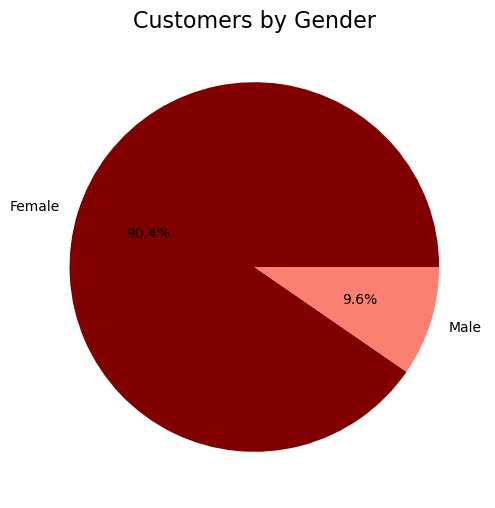

In [110]:
plt.figure(figsize=(6, 6))
gender_fig = market_db['Gender'].value_counts()
plt.pie(gender_fig, labels=gender_fig.index, autopct='%1.1f%%', colors=['maroon','salmon'])
plt.title("Customers by Gender", fontsize=16)
plt.show()

In [111]:
print("From the pie chart above, it is shown that 90.4% of buyers are female while 9.6% of buyers are male")

From the pie chart above, it is shown that 90.4% of buyers are female while 9.6% of buyers are male


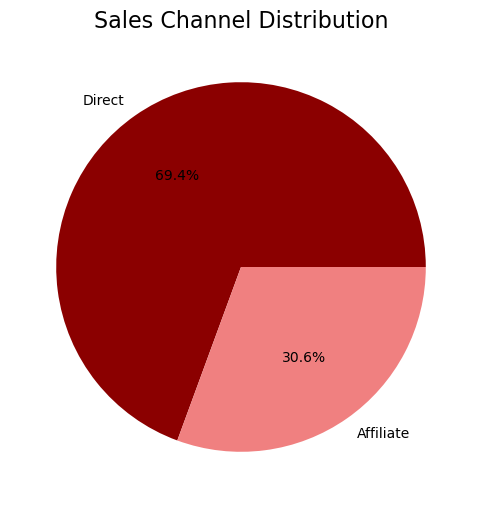

In [61]:
plt.figure(figsize=(6, 6))
sales_channel = market_db['Affiliate_Direct'].value_counts()
plt.pie(sales_channel, labels=sales_channel.index, autopct='%1.1f%%', colors=['darkred','lightcoral'])
plt.title("Sales Channel Distribution", fontsize=16)
plt.show()

In [105]:
print("We have promoted our products through search engine marketing, social media advertising tools, and influencer collaborations, which also function as an affiliate channel. According to the data, 69.4% of buyers accessed our products through direct links, while the remaining 30.6% came through affiliate channels.")

We have promoted our products through search engine marketing, social media advertising tools, and influencer collaborations, which also function as an affiliate channel. According to the data, 69.4% of buyers accessed our products through direct links, while the remaining 30.6% came through affiliate channels.


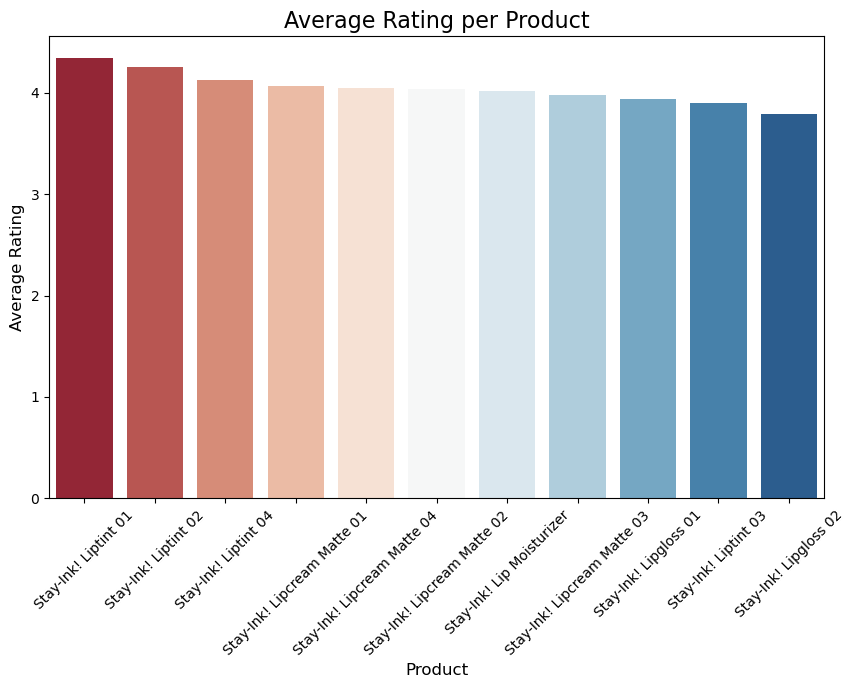

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings.index, y=ratings.values, palette="RdBu")
plt.title("Average Rating per Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [106]:
print("From our online store cite stayink.com, we provide ratings for every purchased product. According to the data, Stay-Ink! Liptint 01 has the highest average rating of 4.34, while Stay-Ink! Lipgloss 02 has the lowest average rating of 3.78")

From our online store cite stayink.com, we provide ratings for every purchased product. According to the data, Stay-Ink! Liptint 01 has the highest average rating of 4.34, while Stay-Ink! Lipgloss 02 has the lowest average rating of 3.78


In [67]:
location_distribution = market_db['Domisili'].value_counts()

In [68]:
print(location_distribution)

Domisili
Bandung         61
Makassar        56
Malang          54
Jakarta         53
Yogyakarta      49
Palembang       48
Semarang        46
Surabaya        41
Medan           41
Denpasar        32
Kuala Lumpur     8
Penang           4
Melaka           3
Singapore        3
Johor Bahru      1
Name: count, dtype: int64


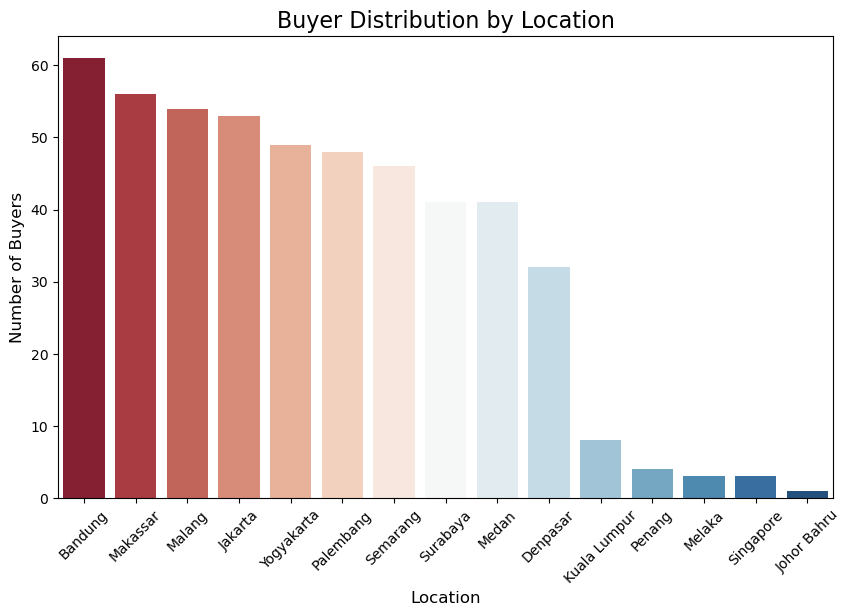

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x=location_distribution.index, y=location_distribution.values, palette="RdBu")
plt.title("Buyer Distribution by Location", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Buyers", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [1]:
print("Based on the sales data, the majority of Stay-Ink! buyers are located in Indonesia, with Bandung (61 buyers) as the highest-contributing city, followed by Makassar (56), Malang (54), and Jakarta (53). Other notable locations include Yogyakarta (49), Palembang (48), Semarang (46), Surabaya (41), and Medan (41). Internationally, we have recorded purchases from Malaysia (Kuala Lumpur (8), Penang (4), Melaka (3), Johor Bahru (1)) and Singapore (3 buyers).")

Based on the sales data, the majority of Stay-Ink! buyers are located in Indonesia, with Bandung (61 buyers) as the highest-contributing city, followed by Makassar (56), Malang (54), and Jakarta (53). Other notable locations include Yogyakarta (49), Palembang (48), Semarang (46), Surabaya (41), and Medan (41). Internationally, we have recorded purchases from Malaysia (Kuala Lumpur (8), Penang (4), Melaka (3), Johor Bahru (1)) and Singapore (3 buyers).
